In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from google.colab import files

In [3]:
uploaded = files.upload()

Saving linear_data.csv to linear_data.csv


In [4]:
data = np.loadtxt('linear_data.csv', delimiter=',')
print(data.shape)

(1000, 3)


In [5]:
labels = data[:, -1]
print(labels.shape)

(1000,)


In [6]:
data = data[:, 0:2]
print(data.shape)

(1000, 2)


In [0]:
positive_x = data[labels == 1,0]
positive_y = data[labels == 1,1]

In [0]:
negative_x = data[labels == 0,0]
negative_y = data[labels == 0,1]

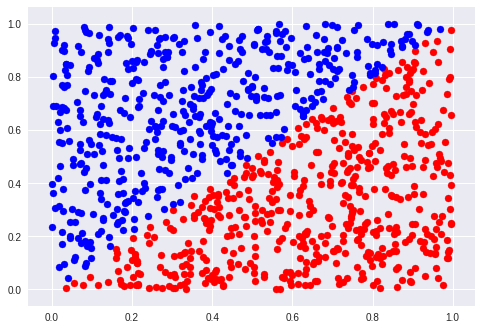

In [9]:
plt.scatter(positive_x, positive_y, c='r')
plt.scatter(negative_x, negative_y, c='b')
plt.show()

In [10]:
weights = np.random.randn(2, ) * 0.01
print(weights)

[-0.00224326 -0.00980614]


In [0]:
lr = 0.05

In [0]:
errors = []

In [13]:
for i in range(data.shape[0]):
  
  # forward pass
  x = data[i, :]
  y = labels[i]
  out = np.dot(x, weights)
  out = np.round(out)
  
  # backward pass
  error = y - out
  errors.append(error)
  
  weights += lr * (error * x)
  
print(weights)

[ 1.3334905  -0.60747534]


In [0]:
all_out = np.round(np.matmul(data, weights))

In [15]:
correct = (all_out == labels)
print(np.mean(correct))

0.814


In [0]:
pred_neg = data[all_out == 0, :]
pred_pos = data[all_out == 1, :]

In [0]:
diff = labels - all_out
wrong_pred = data[diff != 0, :]

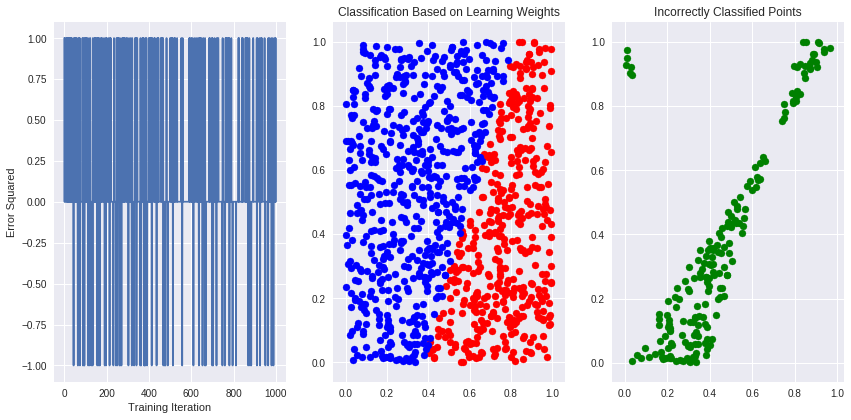

In [18]:
fig = plt.figure(figsize=(12,6))

subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)

subplot1.set_xlabel('Training Iteration')
subplot1.set_ylabel('Error Squared')
subplot1.plot(errors)

subplot2.set_title('Classification Based on Learning Weights')
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')

subplot3.set_title('Incorrectly Classified Points')
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')

plt.tight_layout()
plt.show()


The network’s accuracy without a bias column of ones decreased from 0.968 to 0.814. Changing the weights of a neural network allows you to change the steepness/slope of the graph, but without the bias value, you can’t actually shift the graph horizontally, so you’re limited in your ability to fit the data. With the bias value, the network’s incorrectly classified points were all along the dividing line; without the bias value, they were much more dispersed (see subplot 3). This shows that the bias enabled the network to more accurately classify the inputs by better fitting the data.